In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize



   Unnamed: 0  cue  pressed  outcome  ID
0           0    1        1        1   0
1           1    1        1        1   0
2           2    2        0       -1   0
3           3    2        1        0   0
4           4    1        1        1   0
[0.7755498059508409, 0.6507115135834411, 0.5538243626062322, 0.6644385026737968]


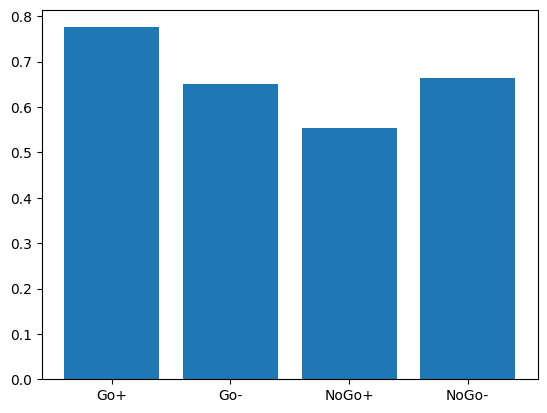

In [49]:

df = pd.read_csv('/Users/lucyk/Library/Mobile Documents/com~apple~CloudDocs/Uni 2/MASTER/neural modeling/coursework/3/gen_data.csv')
cue_mapping = {1: 'Go+', 2: 'Go-', 3: 'NoGo+', 4: 'NoGo-'}  # Go+ = Go to win, Go- = go to avoid losing, NoGo+ = don't go to win, NoGo- = don't go to avoid losing

print(df.head())

# exercise 1: plot the accuracy for each cue

accuracy = [0, 0, 0, 0]
for i in range(len(df)):
    if df['cue'][i] == 1:
            if df['outcome'][i] == 1:
                accuracy[0] += 1
    if df['cue'][i] == 2:
        if df['outcome'][i] == 0:
            accuracy[1] += 1  
    if df['cue'][i] == 3:
        if df['outcome'][i] == 1:
            accuracy[2] += 1
            
    if df['cue'][i] == 4:
        if df['outcome'][i] == 0:
            accuracy[3] += 1

accuracy[0] = accuracy[0]/df['cue'].value_counts()[1]
accuracy[1] = accuracy[1]/df['cue'].value_counts()[2]
accuracy[2] = accuracy[2]/df['cue'].value_counts()[3]
accuracy[3] = accuracy[3]/df['cue'].value_counts()[4]

print(accuracy)
    
plt.bar(cue_mapping.values(), accuracy)
plt.show()


In [97]:
q = pd.DataFrame(0, index=np.arange(len(df)), columns=cue_mapping.values())
q["Go+"][1] = 1
for i in range(1,len(df)):
    for cue in cue_mapping.values():
        q[cue][i] = q[cue][i-1]
        print(q[cue][i])
q["Go+"][1] 

/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_10877/815028254.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  q["Go+"][1] = 1
/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_10877/815028254.py:5: FutureWarning: Ch

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0

In [103]:
beta = 0.1
learning_rate = 0.1
# create a q and w dataframe which is initialized for all cues in cue-mapping having zeros and their length 
q = pd.DataFrame(0, index=np.arange(len(df)), columns=cue_mapping.values())
w = pd.DataFrame(0, index=np.arange(len(df)), columns=cue_mapping.values())
log_likelihood = 0

for i in range(1,len(df)):
    for cue in cue_mapping.values():
        
        q[cue][i] = q[cue][i-1] + learning_rate * (beta - q[cue][i-1])
        w[cue][i] = q[cue][i]  
        #log_likelihood[i] = np.log(softmax(w)[i])
    
#return log_likelihood

/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_10877/1664229300.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  q[cue][i] = q[cue][i-1] + learning_rate * (beta - q[cue][i-1])
/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/

In [113]:
import numpy as np
import pandas as pd
from scipy.special import softmax

def model_1(data, learning_rate, beta, cue_mapping):
    # Initialize q and w DataFrames
    q = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    w = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    log_likelihood = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())

    # Debugging prints
    print("cue_mapping.values():", cue_mapping.values())
    print("q DataFrame after initialization:\n", q)

    for i in range(1, len(data)):
        for cue in cue_mapping.values():
            if cue not in q.columns:
                raise KeyError(f"Cue {cue} not found in q DataFrame columns")
            
            # Explicitly use iloc for consistent indexing
            prev_value = q.iloc[i-1, q.columns.get_loc(cue)]
            q.iloc[i, q.columns.get_loc(cue)] = prev_value + learning_rate * (beta - prev_value)
            w.iloc[i, w.columns.get_loc(cue)] = q.iloc[i, q.columns.get_loc(cue)]
        
        # Calculate log likelihood
            log_likelihood.iloc[i, log_likelihood.columns.get_loc(cue)] = np.log(softmax(q.iloc[i, log_likelihood.columns.get_loc(cue)]))
        
    return log_likelihood


In [114]:
model_1(df, 0.1, 1, cue_mapping)

cue_mapping.values(): dict_values(['Go+', 'Go-', 'NoGo+', 'NoGo-'])
q DataFrame after initialization:
       Go+  Go-  NoGo+  NoGo-
0       0    0      0      0
1       0    0      0      0
2       0    0      0      0
3       0    0      0      0
4       0    0      0      0
...   ...  ...    ...    ...
5995    0    0      0      0
5996    0    0      0      0
5997    0    0      0      0
5998    0    0      0      0
5999    0    0      0      0

[6000 rows x 4 columns]


/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_10877/4290639353.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  q.iloc[i, q.columns.get_loc(cue)] = prev_value + learning_rate * (beta - prev_value)
/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_10877/4290639353.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w.iloc[i, w.columns.get_loc(cue)] = q.iloc[i, q.columns.get_loc(cue)]
/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_10877/4290639353.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incomp

,Go+,Go-,NoGo+,NoGo-
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
5995,0,0,0,0
5996,0,0,0,0
5997,0,0,0,0
5998,0,0,0,0


In [120]:

# define yourself a softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


def model_1(data, learning_rate, beta, cue_mapping):
    # Initialize q and w DataFrames
    q = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    w = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    log_likelihood = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())

    # Debugging prints
    print("cue_mapping.values():", cue_mapping.values())
    print("q DataFrame after initialization:\n", q)

    for i in range(1, len(data)):
        for cue in cue_mapping.values():
            
            # Explicitly use iloc for consistent indexing
            prev_value = q.iloc[i-1, q.columns.get_loc(cue)]
            q.iloc[i, q.columns.get_loc(cue)] = prev_value + learning_rate * (beta - prev_value)
            w.iloc[i, w.columns.get_loc(cue)] = q.iloc[i, q.columns.get_loc(cue)]
        
        # Calculate log likelihood
            #log_likelihood.iloc[i, log_likelihood.columns.get_loc(cue)] = np.log(softmax(q.iloc[i, log_likelihood.columns.get_loc(cue)]))
            log_likelihood += np.log(softmax(q.iloc[i, log_likelihood.columns.get_loc(cue)]))
        
   
    return -log_likelihood


def model_2(data, learning_rate, p_rew, p_pun):
    # run a q-learning model on the data, return the log-likelihood
    # parameters are learning rate and beta, the feedback sensitivity
    q = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    w = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    log_likelihood = 0



    for i in range(len(data)):
            for cue in cue_mapping.values():
                q[cue][0] = 0
                w[cue][0] = 0
                if (data['cue'][i] == 1 & data['outcome'][i] > 1) | (data['cue'][i] == 2 & data['outcome'][i] == 0) | (data['cue'][i] == 3 & data['outcome'][i] > 1) | (data['cue'][i] == 4 & data['outcome'][i] == 0):
                    R = p_rew
                else:
                    R = p_pun

                # R = 0 when reward = 0 ?


                q[i] = q[i-1] + learning_rate * (R - q[i-1])
                w[i] = q[i]
                log_likelihood[i] = np.log(softmax(w)[i])
                

    return log_likelihood



def model_3(data, learning_rate_rew, learning_rate_pun, beta):
    # run a q-learning model on the data, return the log-likelihood
    # parameters are learning rate and beta, the feedback sensitivity
    q = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    w = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    log_likelihood = 0

    q['cue'][0] = 0
    w['cue'][0] = 0

    for i in range(len(data)):
        if (data['cue'][i] == 1 & data['outcome'][i] > 1) | (data['cue'][i] == 2 & data['outcome'][i] == 0) | (data['cue'][i] == 3 & data['outcome'][i] > 1) | (data['cue'][i] == 4 & data['outcome'][i] == 0):
            learning_rate = learning_rate_rew
        else:
            learning_rate = learning_rate_pun

        # add omission learning rate!!!

        q[i] = q[i-1] + learning_rate * (beta - q[i-1])
        w[i] = q[i]
        log_likelihood[i] = np.log(softmax(w)[i])



    return log_likelihood


def model_4(data, learning_rate, beta, bias_rew, bias_pun):
    # run a q-learning model on the data, return the log-likelihood
    # parameters are learning rate and beta, the feedback sensitivity
    q = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    w = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    log_likelihood = 0

    q['cue'][0] = 0
    w['cue'][0] = 0

    for i in range(len(data)):
        #if (data['cue'][i] == 1 & data['outcome'][i] > 1) | (data['cue'][i] == 2 & data['outcome'][i] == 0) | (data['cue'][i] == 3 & data['outcome'][i] > 1) | (data['cue'][i] == 4 & data['outcome'][i] == 0):
            #bias = bias_rew
        #else:
            #bias = bias_pun

        if cue == 0:
            bias = bias_rew
        elif cue == 1:
            bias

        q[i] = q[i-1] + learning_rate * (beta - q[i-1])
        w[i] = q[i] + bias
        log_likelihood[i] = np.log(softmax(w)[i])


    return log_likelihood

def model_5(data, learning_rate, p_rew, p_pun, bias_rew, bias_pun):
    # run a q-learning model on the data, return the log-likelihood
    # parameters are learning rate and beta, the feedback sensitivity
    q = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    w = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    log_likelihood = 0

    q['cue'][0] = 0
    w['cue'][0] = 0

    for i in range(len(data)):
        if (data['cue'][i] == 1 & data['outcome'][i] > 1) | (data['cue'][i] == 2 & data['outcome'][i] == 0) | (data['cue'][i] == 3 & data['outcome'][i] > 1) | (data['cue'][i] == 4 & data['outcome'][i] == 0):
            bias = bias_rew
            beta = p_rew
        else:
            bias = bias_pun
            beta = p_pun
        q[i] = q[i-1] + learning_rate * (beta - q[i-1])
        w[i] = q[i] + bias
        log_likelihood[i] = np.log(softmax(w)[i])


    return log_likelihood

def model_6(data, learning_rate, p_rew, p_pun, bias_rew, bias_pun):
    # run a q-learning model on the data, return the log-likelihood
    # parameters are learning rate and beta, the feedback sensitivity
    q = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    w = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    log_likelihood = 0

    q['cue'][0] = 0
    w['cue'][0] = 0

    for i in range(len(data)):
        if (data['cue'][i] == 1 & data['outcome'][i] > 1) | (data['cue'][i] == 2 & data['outcome'][i] == 0) | (data['cue'][i] == 3 & data['outcome'][i] > 1) | (data['cue'][i] == 4 & data['outcome'][i] == 0):
            bias = bias_rew
            beta = p_rew
        else:
            bias = bias_pun
            beta = p_pun


        if reward == 0:
            return 0
        elif reward == 1 & action == 0:

        

        q[i] = q[i-1] + learning_rate * (beta - q[i-1])
        w[i] = q[i] + bias
        log_likelihood[i] = np.log(softmax(w)[i])


    return log_likelihood

def model_7(data, learning_rate_rew, learning_rate_pun, p_rew, p_pun, bias_rew, bias_pun):
    # run a q-learning model on the data, return the log-likelihood
    # parameters are learning rate and beta, the feedback sensitivity
    q = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    w = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    log_likelihood = 0

    q['cue'][0] = 0
    w['cue'][0] = 0

    for i in range(len(data)):
        if (data['cue'][i] == 1 & data['outcome'][i] > 1) | (data['cue'][i] == 2 & data['outcome'][i] == 0) | (data['cue'][i] == 3 & data['outcome'][i] > 1) | (data['cue'][i] == 4 & data['outcome'][i] == 0):
            learning_rate = learning_rate_rew
            bias = bias_rew
            beta = p_rew
        else:
            learning_rate = learning_rate_pun
            bias = bias_pun
            beta = p_pun

        # learning rate depends on action not reward?? 

        q[i] = q[i-1] + learning_rate * (beta - q[i-1])
        w[i] = q[i] + bias
        log_likelihood[i] = np.log(softmax(w)[i])


    return log_likelihood

In [122]:
model_1(df, 0.1, 0.1, cue_mapping)
print(log_likelihood)

cue_mapping.values(): dict_values(['Go+', 'Go-', 'NoGo+', 'NoGo-'])
q DataFrame after initialization:
       Go+  Go-  NoGo+  NoGo-
0       0    0      0      0
1       0    0      0      0
2       0    0      0      0
3       0    0      0      0
4       0    0      0      0
...   ...  ...    ...    ...
5995    0    0      0      0
5996    0    0      0      0
5997    0    0      0      0
5998    0    0      0      0
5999    0    0      0      0

[6000 rows x 4 columns]


/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_10877/1989823800.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.010000000000000002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  q.iloc[i, q.columns.get_loc(cue)] = prev_value + learning_rate * (beta - prev_value)
/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_10877/1989823800.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.010000000000000002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w.iloc[i, w.columns.get_loc(cue)] = q.iloc[i, q.columns.get_loc(cue)]
/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_10877/1989823800.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pa

0


In [52]:
def additional_model(data, learning_rate, p_rew, p_pun, bias_rew, bias_pun, p):
    # Create an additional model which takes into account Pavlovian biases. Use model 7 as a starting point for this. Add a parameter p to the model. To determine the action values to put into the softmax function for a given cue, take the Q-values, add the general bias to approach or withhold
    #  and add p to the Q-value for approaching if the maximum Q-value for the current cue is positive, or add p to the Q-value for withholding if the maximal Q-value for the current cue is negative

    q = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    w = pd.DataFrame(0, index=np.arange(len(data)), columns=cue_mapping.values())
    log_likelihood = 0

    for i in range(len(data)):
        if (data['cue'][i] == 1 & data['outcome'][i] > 1) | (data['cue'][i] == 2 & data['outcome'][i] == 0) | (data['cue'][i] == 3 & data['outcome'][i] > 1) | (data['cue'][i] == 4 & data['outcome'][i] == 0):
            bias = bias_rew
            beta = p_rew
        else:
            bias = bias_pun
            beta = p_pun
        q[i] = q[i-1] + learning_rate * (beta - q[i-1])
        if np.max(q) > 0:
            w[i] = q[i] + bias + p
        else:
            w[i] = q[i] + bias + p
        log_likelihood[i] = np.log(softmax(w)[i])

    return log_likelihood


In [ ]:

method = 'Nelder-Mead'  # this optimization should work for the given data, but feel free to try others as well, they might be faster

# define a function to compute the BIC
def BIC(data, log_likelihood, k):
    BIC = 0
    BIC = k*np.log(len(data)) - 2*log_likelihood(data)
    return BIC


for j, learner in enumerate([model_1]):

    for i, subject in enumerate(np.unique(df.ID)):
        subject_data = ... # subset data to one subject
        subject_data = subject_data.reset_index(drop=True)  # not resetting the index can lead to issues

        if j == 0:

            # define yourself a loss for the current model
            def loss(params):
                return -learner(subject_data, *params).sum()
            res = minimize(loss, ...initial_params..., bounds=..., method=method)

            # save the optimized log-likelihhod
            log_likelihood = -res.fun

            # save the fitted parameters
            params = res.x
            print(params)

    # compute BIC
    bic = BIC(subject_data, log_likelihood, len(params))



    



In [55]:
# plot learning rates of the last model
plt.plot(params)
plt.show()


NameError: name 'params' is not defined

Compare the fitted εrew and εpun for the last model. How do you interpret the difference in their means?

The mean of the learning rate for rewards is higher than the mean of the learning rate for punishments. This means that the model is more sensitive to rewards than to punishments. This could be due to the fact that rewards are more salient and thus more likely to be learned from than punishments.


In [ ]:
# Bonus
#Fit the first subject 10 times with the last model, using different initial parameters. Create a scatter plot between the fitted biasapp and biaswth across the fits. How do you explain this plot?

for i in range(10):
    res = minimize(loss, ...initial_params..., bounds=..., method=method)
    params = res.x
    print(params)
    plt.scatter(params[2], params[3])
    plt.show()

    